In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import nltk
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt


#nltk.download('stopwords')
#nltk.download('wordnet')

In [ ]:
# Load the data
news_df = pd.read_csv('us_equities_news_dataset.csv') 
news_df['content'] = news_df['content'].fillna('')
texts = news_df['content'].tolist()

In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = simple_preprocess(text)  # Tokenization and lowercasing
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

#processed_texts = [preprocess(text) for text in texts]

In [3]:
#predf = pd.DataFrame({'processed_text': [' '.join(text) for text in processed_texts]})
#predf.to_csv("processed_texts.csv", index=False)

In [4]:
processed_texts = pd.read_csv('processed_texts.csv')

In [5]:
processed_texts['processed_text'] = processed_texts['processed_text'].fillna('')
processed_texts = processed_texts['processed_text'].apply(lambda x: x.split()).tolist()

In [6]:
# Create Dictionary
dictionary = Dictionary(processed_texts)

# Filter extremes (optional)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in processed_texts]


In [29]:
#With 10 Passes
def compute_coherence_values_passes_10(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train LDA model
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10,
                         alpha='auto',
                         eta='auto')
        
        # Store model and coherence score
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
#With 5 Passes
def compute_coherence_values_passes_5(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train LDA model
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10,
                         alpha='auto',
                         eta='auto')
        
        # Store model and coherence score
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
# Train LDA model with an example of 5 topics
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,  # Experiment with different numbers of topics
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     eta='auto')

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.010*"percent" + 0.008*"rate" + 0.008*"week" + 0.007*"oil" + 0.007*"month" + 0.006*"bank" + 0.006*"index" + 0.006*"trade" + 0.006*"point" + 0.005*"dollar"
Topic 2: 0.033*"quarter" + 0.033*"earnings" + 0.023*"zacks" + 0.022*"estimate" + 0.020*"million" + 0.018*"revenue" + 0.014*"billion" + 0.014*"consensus" + 0.013*"per" + 0.011*"rank"
Topic 3: 0.020*"said" + 0.006*"would" + 0.005*"reuters" + 0.005*"bank" + 0.004*"billion" + 0.004*"one" + 0.004*"state" + 0.004*"percent" + 0.004*"two" + 0.004*"million"
Topic 4: 0.011*"investor" + 0.010*"fund" + 0.010*"zacks" + 0.008*"investment" + 0.007*"ratio" + 0.006*"value" + 0.006*"growth" + 0.006*"dividend" + 0.006*"industry" + 0.006*"rank"
Topic 5: 0.011*"inc" + 0.009*"service" + 0.007*"business" + 0.007*"customer" + 0.007*"growth" + 0.006*"network" + 0.006*"technology" + 0.006*"product" + 0.006*"sale" + 0.005*"mobile"


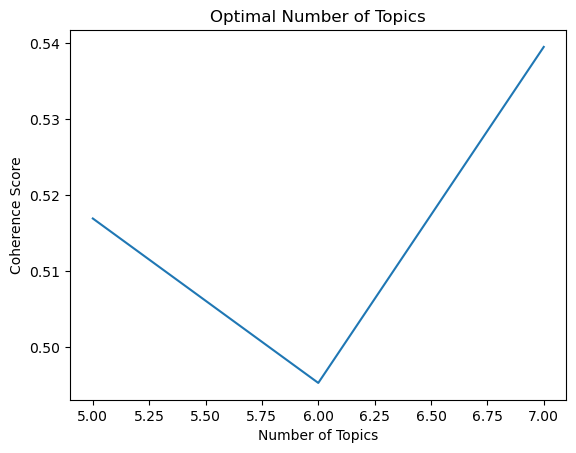

In [17]:
# Test coherence for topics between 5 and 8 with 5 passes on whole corpus
model_list, coherence_values = compute_coherence_values_passes_5(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=5, limit=8)

# Plot coherence values
x = range(5, 8)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()


In [ ]:
#With 10 passes on the whole corpus
model_list, coherence_values = compute_coherence_values_passes_10(dictionary=dictionary, corpus=corpus, texts=processed_texts, start=9, limit=13)

x = range(9, 13)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()
                                                                  

In [11]:
# Train LDA model with an example of 8 topic
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=8,  # Experiment with different numbers of topics
                     random_state=42,
                     passes=5,
                     alpha='auto',
                     eta='auto')

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.016*"percent" + 0.011*"rate" + 0.009*"bank" + 0.009*"month" + 0.008*"week" + 0.008*"index" + 0.007*"dollar" + 0.007*"fed" + 0.006*"data" + 0.006*"economy"
Topic 2: 0.055*"oil" + 0.026*"energy" + 0.021*"gas" + 0.019*"production" + 0.018*"barrel" + 0.015*"crude" + 0.013*"point" + 0.010*"million" + 0.010*"trade" + 0.010*"natural"
Topic 3: 0.008*"time" + 0.007*"one" + 0.006*"point" + 0.005*"like" + 0.005*"see" + 0.005*"back" + 0.005*"well" + 0.005*"would" + 0.004*"think" + 0.004*"going"
Topic 4: 0.020*"zacks" + 0.017*"fund" + 0.015*"investor" + 0.013*"investment" + 0.011*"ratio" + 0.011*"industry" + 0.010*"rank" + 0.010*"growth" + 0.010*"earnings" + 0.010*"dividend"
Topic 5: 0.009*"drug" + 0.008*"zacks" + 0.008*"product" + 0.007*"inc" + 0.007*"growth" + 0.006*"patient" + 0.006*"study" + 0.006*"rank" + 0.005*"treatment" + 0.005*"sale"
Topic 6: 0.040*"quarter" + 0.038*"earnings" + 0.024*"estimate" + 0.023*"revenue" + 0.022*"million" + 0.021*"zacks" + 0.015*"billion" + 0.015*"conse

<span style="font-size:20px">Moving forward I will continue with the filtered dataset.</span>

In [ ]:
#Filter the news dataset for the articles that contain knowledge about NVidia.
#These can be abbravations for Nvidia or just the name so this list contains words I'm searchinmg for in filtering the dataset
#by checking if all content or title contain "nvidia_terms" list.
nvidia_terms = [
    'Nvidia', 'NVDA', 'N V D I A', 'Nvidia Corporation', 'NVIDIA Corp', 
    'NVIDIA GPUs', 'NVIDIA graphics', 'NVIDIA chip', 'NVIDIA cards', 
    'Nvidia GeForce', 'GeForce', 'Nvidia Quadro', 'NVIDIA AI', 
    'NVIDIA Tegra', 'Nvidia Drive', 'Nvidia RTX', 'RTX', 
    'NVIDIA DGX', 'NVIDIA Shield', 'CUDA', 'NVIDIA Jetson', 
    'NVIDIA Omniverse', 'NVIDIA Hopper', 'NVIDIA architecture',
    'Nvidia hardware', 'Nvidia software', 'NVIDIA tech'
]

#Second filtering is applied to tickers to find the some companies that can affect the price. 
#My research shows AMD and Intel are the biggest competitors for Nvidia so I'm also including articles with ticker = 'AMD,INTC'
filtered_news_df = news_df[
    (news_df['title'].str.contains('|'.join(nvidia_terms), case=False, na=False)) |
    (news_df['content'].str.contains('|'.join(nvidia_terms), case=False, na=False)) |
    (news_df['ticker'].isin(['AMD', 'INTC']))  # Filter for AMD and Intel tickers
]

# Display the filtered DataFrame with Nvidia, AMD, and Intel related articles
#print(filtered_news_df[['ticker', 'title', 'release_date']])


In [8]:
filtered_news_df

,id,ticker,title,category,content,release_date,provider,url,article_id
24,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ECB Effects\nThe move in the euro was huge fa...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687
32,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931
57,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,Investing com A rout in Apple and Facebook ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042
78,221593,UBER,The Zacks Analyst Blog Highlights Advanced Mi...,opinion,For Immediate ReleaseChicago IL January 13 ...,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277
82,221597,UBER,The Best Of CES 2020 Revised,opinion,With 4 500 companies bringing their innovation...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164
...,...,...,...,...,...,...,...,...,...
221198,442714,AMD,7 Tech Stocks With SMA50 Above SMA200 And High...,opinion,Recent Performance of the Stocks Mentioned Bel...,2012-12-07,Contextuall,https://www.investing.com/analysis/7-tech-stoc...,146575
221202,442718,AMD,Deceased Rubber Felines,opinion,Some of the most amazing gainers during this r...,2012-11-25,Tim Knight,https://www.investing.com/analysis/deceased-ru...,144821
221229,442745,PFE,Durata Therapeutics DRTX Pre IPO Report,opinion,Based in Morristown NJ Durata Therapeutics ...,2012-07-19,Francis Gaskins,https://www.investing.com/analysis/durata-ther...,130084
221468,442984,T,Zacks com Featured Highlights AT T Nu Skin E...,opinion,For Immediate Release\n\nChicago IL July 22...,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537


In [10]:
processed_texts_filtered = filtered_news_df['processed_text']

In [16]:
processed_texts_filtered

0       ecb effect move euro huge falling pip huge imp...
1       stock watch march trading session stock stock ...
2       investing com rout apple facebook nasdaq fb mo...
3       immediate releasechicago il january zacks com ...
4       company bringing innovation ce jan get really ...
                              ...                        
7251    recent performance stock mentioned average wee...
7252    amazing gainer recent counter trend rally stea...
7253    based morristown nj durata therapeutic drtx sc...
7254    immediate release chicago il july stock week a...
7255    uncertainty ruling market since beginning year...
Name: processed_text, Length: 7256, dtype: object

In [ ]:
# Apply preprocessing and save to a new column in the DataFrame
filtered_news_df['processed_content'] = filtered_news_df['content'].apply(preprocess)

In [4]:
filtered_news_df = pd.read_csv('filtered_processed_df.csv')

In [17]:
# Tokenize each document
processed_texts_input = [doc.split() for doc in processed_texts_filtered]

# Create Dictionary
dictionary_filtered = Dictionary(processed_texts_input)

# Filter extremes (optional)
dictionary_filtered.filter_extremes(no_below=5, no_above=0.5)

In [23]:
start, limit = 4,10
# Run the function and save models
model_list_filtered, coherence_values_filtered = compute_coherence_values_passes_5(dictionary=dictionary_filtered,
                                                                                   corpus=corpus_filtered, 
                                                                                   texts=processed_texts_filtered, 
                                                                                   start=4, 
                                                                                   limit=10)


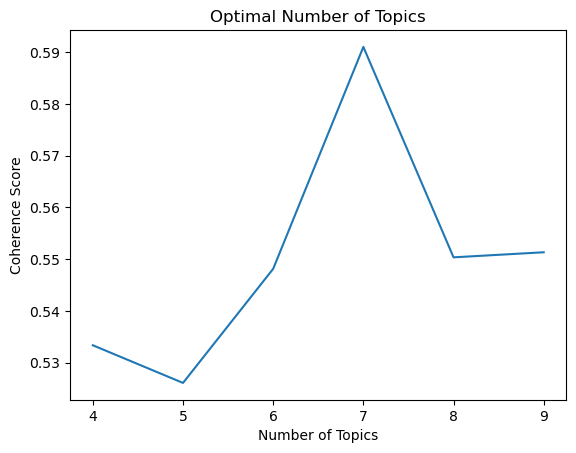

In [25]:

# Plot coherence values
x = range(4, 10)
plt.plot(x, coherence_values_filtered)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

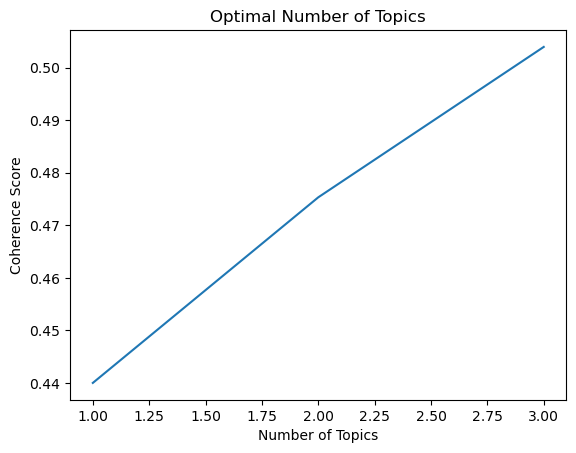

In [26]:
model_list_filtered, coherence_values_filtered = compute_coherence_values_passes_5(dictionary=dictionary_filtered, 
                                                                                   corpus=corpus_filtered, 
                                                                                   texts=processed_texts_filtered, 
                                                                                   start=1, 
                                                                                   limit=4)
x = range(1,4)
plt.plot(x, coherence_values_filtered)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

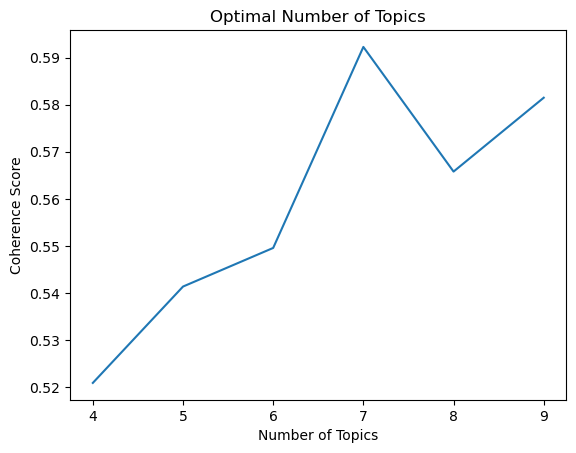

In [32]:
model_list_filtered, coherence_values_filtered = compute_coherence_values_step_10(dictionary=dictionary_filtered, 
                                                                                  corpus=corpus_filtered, 
                                                                                  texts=processed_texts_filtered, 
                                                                                  start=4, 
                                                                                  limit=10)
x = range(4,10)
plt.plot(x, coherence_values_filtered)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

In [23]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

corpus = [dictionary_filtered.doc2bow(doc) for doc in processed_texts_input]

lda_model = LdaModel(corpus=corpus, id2word=dictionary_filtered, num_topics=8, random_state=42, passes=5, alpha='auto', eta='auto')

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

# Optional Step 4: Calculate coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts_input, dictionary=dictionary_filtered, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)

Topic 0: 0.020*"quarter" + 0.017*"revenue" + 0.016*"zacks" + 0.012*"million" + 0.011*"nvidia" + 0.010*"growth" + 0.010*"billion" + 0.008*"estimate" + 0.008*"rank" + 0.007*"per"
Topic 1: 0.026*"zacks" + 0.011*"estimate" + 0.010*"rank" + 0.010*"investment" + 0.008*"quarter" + 0.008*"growth" + 0.007*"research" + 0.006*"industry" + 0.006*"buy" + 0.006*"analyst"
Topic 2: 0.070*"inc" + 0.024*"close" + 0.022*"rose" + 0.020*"performer" + 0.020*"corporation" + 0.019*"point" + 0.018*"fell" + 0.017*"trade" + 0.015*"index" + 0.013*"dow"
Topic 3: 0.019*"apple" + 0.019*"chip" + 0.014*"qualcomm" + 0.011*"said" + 0.009*"google" + 0.008*"billion" + 0.008*"inc" + 0.007*"semiconductor" + 0.007*"device" + 0.006*"analyst"
Topic 4: 0.047*"percent" + 0.012*"div" + 0.009*"class" + 0.005*"strong" + 0.004*"span" + 0.004*"target" + 0.004*"id" + 0.003*"px" + 0.003*"href" + 0.003*"price"
Topic 5: 0.008*"week" + 0.007*"investor" + 0.007*"day" + 0.007*"time" + 0.006*"one" + 0.006*"price" + 0.005*"like" + 0.005*"high

In [44]:
new_df = pd.read_csv('data_cleaned.csv')

In [46]:
new_df.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id,word_count,tokens
0,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ecb move euro huge falling pips huge important...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,784,"['ecb', 'move', 'euro', 'huge', 'falling', 'pi..."
1,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,stocks watch march trading went pretty much no...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,618,"['stocks', 'watch', 'march', 'trading', 'went'..."
2,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,investing com rout apple facebook fb monday sw...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,578,"['investing', 'com', 'rout', 'apple', 'faceboo..."
3,221593,UBER,The Zacks Analyst Blog Highlights Advanced Mi...,opinion,immediate releasechicago il january com announ...,2020-01-12,Zacks Investment Research,https://www.investing.com/analysis/the-zacks-a...,200498277,1849,"['immediate', 'releasechicago', 'il', 'january..."
4,221597,UBER,The Best Of CES 2020 Revised,opinion,companies bringing innovations ces jan gets re...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,1515,"['companies', 'bringing', 'innovations', 'ces'..."


In [47]:
processed_texts_filtered = new_df['content']

In [48]:
# Tokenize each document
processed_texts_input = [doc.split() for doc in processed_texts_filtered]

# Create Dictionary
dictionary_filtered = Dictionary(processed_texts_input)

# Filter extremes (optional)
dictionary_filtered.filter_extremes(no_below=5, no_above=0.5)

In [49]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

corpus = [dictionary_filtered.doc2bow(doc) for doc in processed_texts_input]

lda_model = LdaModel(corpus=corpus, id2word=dictionary_filtered, num_topics=8, random_state=42, passes=5, alpha='auto', eta='auto')

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

# Optional Step 4: Calculate coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts_input, dictionary=dictionary_filtered, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)

Topic 1: 0.016*"amd" + 0.013*"etf" + 0.011*"semiconductor" + 0.008*"fund" + 0.006*"index" + 0.005*"top" + 0.005*"read" + 0.005*"around" + 0.005*"higher" + 0.005*"etfs"
Topic 2: 0.013*"analyst" + 0.008*"today" + 0.007*"research" + 0.006*"inc" + 0.005*"reports" + 0.005*"like" + 0.005*"time" + 0.004*"portfolio" + 0.004*"well" + 0.004*"business"
Topic 3: 0.016*"million" + 0.013*"revenues" + 0.009*"rank" + 0.008*"share" + 0.008*"consensus" + 0.008*"per" + 0.007*"estimate" + 0.005*"cents" + 0.005*"fiscal" + 0.005*"reported"
Topic 4: 0.008*"intel" + 0.006*"said" + 0.006*"driving" + 0.005*"ai" + 0.005*"data" + 0.005*"apple" + 0.004*"self" + 0.004*"chips" + 0.004*"like" + 0.004*"google"
Topic 5: 0.009*"trade" + 0.008*"week" + 0.006*"index" + 0.005*"percent" + 0.005*"china" + 0.005*"day" + 0.005*"rose" + 0.005*"fell" + 0.005*"since" + 0.004*"traded"
Topic 6: 0.015*"revenue" + 0.010*"share" + 0.009*"investors" + 0.008*"sales" + 0.007*"per" + 0.006*"estimates" + 0.006*"industry" + 0.006*"report" +